In [2]:
from enum import unique
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
import os
from dotenv import load_dotenv
load_dotenv()
import numpy as np

initial_number = 9000000
number_of_blocks = 500

df = pd.read_pickle(os.environ['SAVE_DF_PATH']+"_"+str(initial_number)+"_"+str(number_of_blocks))

sender = df['Sender Address'].tolist()
receiver = df['Receiver Address'].tolist()
total = sender + receiver

# new_df = df.groupby(['Receiver Address'])['Sender Address'].count().reset_index(
#   name='Count').sort_values(['Count'], ascending=False)

# Voy a realizar estadistica descriptiva sobre todas las transacciones que tengo

total_transactions = len(sender)
# Numero de transacciones totales en 500 bloques
print(f'Total number of transactions: {total_transactions}')
# Numero de Senders
sender_unique = list(set(sender))
print(f'Total number of senders: {len(sender_unique)}')
# Numero de Receivers
receiver_unique = list(set(receiver))
print(f'Total number of receivers: {len(receiver_unique)}')
# Numero total de cuentas activas en este chunk
total_accounts = list(set(total))
print(f'Total active accounts in this chunk: {len(total_accounts)}')

# Numero de transacciones promedio por sender
txn_per_sender= []
unique_connections_per_sender= []
for sender in sender_unique:
    txns = df[df['Sender Address'] == sender]
    received_txns_addresses = txns['Receiver Address'].tolist()
    unique_received_txns_addresses = list(set(received_txns_addresses))
    txn_number = len(received_txns_addresses)
    unique_txn_number = len(unique_received_txns_addresses)

    txn_per_sender.append(txn_number)
    unique_connections_per_sender.append(unique_txn_number)
txn_per_sender = np.array(txn_per_sender)
unique_connections_per_sender = np.array(unique_connections_per_sender)
mean_txn_per_sender = np.mean(txn_per_sender)
mean_unique_connections_per_sender = np.mean(unique_connections_per_sender)

print(f'Mean amount of transactions per sender: {round(mean_txn_per_sender,2)}')
print(f'Mean amount of unique receiver accounts for a given sender: {round(mean_unique_connections_per_sender,2)}')



# Numero de transacciones promedio por receiver
txn_per_receiver= []
unique_connections_per_receiver= []
for receiver in receiver_unique:
    txns = df[df['Receiver Address'] == receiver]
    sent_txns_addresses = txns['Sender Address'].tolist()
    unique_sent_txns_addresses = list(set(sent_txns_addresses))
    txn_number = len(sent_txns_addresses)
    unique_txn_number = len(unique_sent_txns_addresses)

    txn_per_receiver.append(txn_number)
    unique_connections_per_receiver.append(unique_txn_number)

txn_per_receiver = np.array(txn_per_receiver)
unique_connections_per_receiver = np.array(unique_connections_per_receiver)
mean_txn_per_receiver = np.mean(txn_per_receiver)
mean_unique_connections_per_receiver = np.mean(unique_connections_per_receiver)

print(f'Mean amount of transactions per receiver: {round(mean_txn_per_receiver,2)}')
print(f'Mean amount of unique sender accounts for a given receiver: {round(mean_unique_connections_per_receiver,2)}')

Total number of transactions: 10684
Total number of senders: 341
Total number of receivers: 5016
Total active accounts in this chunk: 5037
Mean amount of transactions per sender: 31.33
Mean amount of unique receiver accounts for a given sender: 15.56
Mean amount of transactions per receiver: 2.13
Mean amount of unique sender accounts for a given receiver: 1.06


In [3]:
# De el total de cuentas, cuantas son solo senders, cuantas solo receivers, cuantas ambas?
### Para senders
only_sender = []
only_receiver = []

for sender in sender_unique:
    receiving_sender = df[df['Receiver Address'] == sender]
    receiving_sender = receiving_sender['Receiver Address'].tolist()
    if len(receiving_sender) == 0:
        only_sender.append(sender)

print(f'Number of only sender accounts: {len(only_sender)}')

sender_proportion = len(only_sender)/len(sender_unique)
sender_total_proportion = len(only_sender)/len(total_accounts)
print(f'{round(sender_proportion*100,2)}% percent of senders are only senders')
print(f'{round(sender_total_proportion*100,2)}% percent of accounts are only senders')

### Para receivers


for receiver in receiver_unique:
    sending_receiver = df[df["Sender Address"] == receiver]
    sending_receiver = sending_receiver['Sender Address'].tolist()
    if len(sending_receiver) == 0:
        only_receiver.append(receiver)

print(f'Number of only receiver accounts: {len(only_receiver)}')
receiver_proportion = len(only_receiver)/len(receiver_unique)
receiver_total_proportion = len(only_receiver) / len(total_accounts)
print(f'{round(receiver_proportion*100,2)}% percent of receivers are only receivers')
print(f'{round(receiver_total_proportion*100,2)}% percent of accounts are only receivers')

Number of only sender accounts: 21
6.16% percent of senders are only senders
0.42% percent of accounts are only senders
Number of only receiver accounts: 4696
93.62% percent of receivers are only receivers
93.23% percent of accounts are only receivers


In [4]:
# Numero de cuentas unicas con las que se comunica un sender

# Numero de cuentas unicas con las que se comunica un receiver

# De las cuentas con las que interactua, cuantas veces se comunica en promedio con la misma cuenta?


sender_comms_count = [] # aca guardo con cuantas cuentas se comunica un sender
receiver_comms_count = [] #aca guardo con cuantas cuentas se comunica un receiver
mean_accounts_senders = [] # aca guardo cuantas veces se comunica con un mismo receiver cada sender
mean_accounts_receivers = [] #aca guardo cuantas veces se comunica con un mismo sender cada receiver

for sender in sender_unique:
    sender_filtered = df[df['Sender Address'] == sender]
    receivers = sender_filtered['Receiver Address'].tolist()
    sender_comms_count.append(len(list(set(receivers))))
    for receiver in list(set(receivers)):
        counter = []
        counter.append(receivers.count(receiver))
    counter = np.array(counter)
    mean_accounts_senders.append(np.mean(counter))

mean_accounts_senders = np.array(mean_accounts_senders)
real_mean_senders = np.mean(mean_accounts_senders)


for receiver in receiver_unique:
    receiver_filtered = df[df['Receiver Address'] == receiver]
    senders = receiver_filtered['Sender Address'].tolist()
    receiver_comms_count.append(len(list(set(senders))))
    for sender in list(set(senders)):
        counter = []
        counter.append(senders.count(sender))
    counter = np.array(counter)
    mean_accounts_receivers.append(np.mean(counter))

mean_accounts_receivers = np.array(mean_accounts_receivers)
real_mean_receivers = np.mean(mean_accounts_receivers)
mean_sender_comms_count = np.mean(np.array(sender_comms_count))
mean_receivers_comms_count = np.mean(np.array(receiver_comms_count))

print(f'A given sender in average transacts with {round(mean_sender_comms_count,2)} accounts')
print(f'A given receiver in average transacts with {round(mean_receivers_comms_count,2)} accounts')
print(f'A given sender in average transacts with the same account {round(real_mean_senders,2)} times')
print(f'A given receiver in average transacts with the same account {round(real_mean_receivers,2)} times')

A given sender in average transacts with 15.56 accounts
A given receiver in average transacts with 1.06 accounts
A given sender in average transacts with the same account 2.62 times
A given receiver in average transacts with the same account 2.07 times


Top 10 most frequently used Assets Ids :[27165954, 2513338, 2512768, 2513746, 2514157, 2254146, 312769]
Percenteage of total transactions involving each asset: [4.09030815e+01 2.39703041e+01 2.16617512e+01 1.22139734e+01
 1.21021052e+00 3.05095088e-02 1.01698363e-02]
Number of unique senders for each asset: [1, 131, 88, 55, 11, 1, 1]
Number of unique receivers for each asset: [65, 2093, 1570, 1112, 109, 1, 1]
Number of unique accounts for each asset: [66, 2094, 1571, 1113, 110, 1, 1]
Percentage of total accounts using this given asseta for each asset: (array([1.31030375e+00, 4.15723645e+01, 3.11891999e+01, 2.20964860e+01,
       2.18383959e+00, 1.98530872e-02, 1.98530872e-02]), 2)


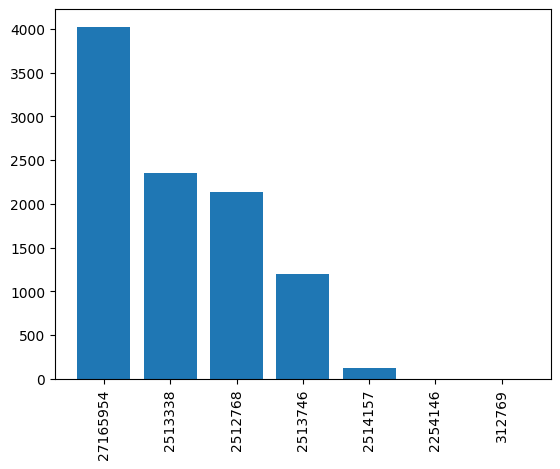

In [5]:
# Cual es el asset id que mas se repite? Cuanto porcentaje de las transacciones involucran a cada asset?

asset_id = df['Asset Id'].tolist()

ids = []
for i in range(len(asset_id)):

    id = asset_id[i]
    if id != 'NA':
        ids.append(id)

for id in ids:
    id = str(id)
ids = pd.DataFrame(data= {"Asset Id": ids})
asset_txn = len(ids['Asset Id'].tolist())


counter = ids.groupby(['Asset Id'])['Asset Id'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
counter = counter[:10]

Ids = counter['Asset Id'].tolist()
counts = counter['Count'].tolist()

ticks = range(len(Ids))

plt.bar(ticks, counts, align = 'center')
plt.xticks(ticks, Ids, rotation = 'vertical')

asset_total_proportion = np.array(counts)/asset_txn
print(f'Top 10 most frequently used Assets Ids :{Ids}')
print(f'Percenteage of total transactions involving each asset: {asset_total_proportion*100}')

unique_accounts = []
unique_sending = []
unique_receiving = []

# Cuantas cuentas unicas usan ese mismo asset? Cual es el promedio de cuentas que usan cada asset? Histograma de eso
for id in Ids:

  filtered = df[df['Asset Id'] == id]
  sending = filtered['Sender Address'].tolist()
  receiving = filtered['Receiver Address'].tolist()
  unique_sending.append(len(list(set(sending))))
  unique_receiving.append(len(list(set(receiving))))
  total = sending + receiving
  unique_accounts.append(len(list(set(total))))

print(f'Number of unique senders for each asset: {unique_sending}')
print(f'Number of unique receivers for each asset: {unique_receiving}')
print(f'Number of unique accounts for each asset: {unique_accounts}')

account_proportion = np.array(unique_accounts)/len(total_accounts)

print(f'Percentage of total accounts using this given asseta for each asset: {account_proportion*100,2}')

In [6]:
# Numero de transacciones que involucran un amount igual a 0, menor a 1, que tipo de asset se mandan?
amount = df['Transaction Amount'].tolist()
amt = []
for i in range(len(amount)):
    txn = amount[i]
    if txn != 'NA':
        amt.append(txn)

def condition(x):
    return x == 1

amount_1 = sum(map(condition, amt))
print(f'Number of transaction which send 1 of an Asset: {amount_1}')

one = df[df['Transaction Amount'] == 1]
what_asset = one['Asset Id'].tolist()

print(what_asset.count(127746157))
print(list(set(what_asset)))

#Por lo que se ve ademas de la 127746786 moneda esta del coso de ajedrez la mayoria de las demas son NFTs o assets unicos.


Number of transaction which send 1 of an Asset: 4
0
['NA', 2254146]


In [8]:
# Por cada tipo de transaccion, cuantas cuentas estan involucradas? Cuanto porcentaje del total de las transacciones en este chunk?

# Cual es el promedio de senders y receivers por cada tipo de transaccion?


types = df['Transaction Type']
txn_type = list(set(types))
print(f'Tipos de transaccion: {txn_type} \n')

senders_per_type = dict()
receivers_per_type = dict()
accounts_per_type = dict()
total_accounts_involved = []

for type in txn_type:
    df_with_type = df[df['Transaction Type'] == type]
    senders_involved = df_with_type['Sender Address'].tolist()
    receivers_involved = df_with_type['Receiver Address'].tolist()
    total_involved = senders_involved + receivers_involved
    accounts_per_type[type] = len(list(set(total_involved)))
    senders_per_type[type] = len(list(set(senders_involved)))
    receivers_per_type[type] = len(list(set(receivers_involved)))

print(f'Total involved accounts per transaction type: {accounts_per_type} \n')
print(f'Total senders involved per transaction type : {senders_per_type}\n')
print(f'Total receivers involved per transaction type: {receivers_per_type} \n')
percent_accounts_per_type = dict()
for key in accounts_per_type:
    number = accounts_per_type[key]
    percent_accounts_per_type[key] = round(number/len(total_accounts)*100,2)

print(f'Percentage of all accounts involved for each transaction type {percent_accounts_per_type}')


Tipos de transaccion: ['axfer', 'pay'] 

Total involved accounts per transaction type: {'axfer': 4957, 'pay': 363} 

Total senders involved per transaction type : {'axfer': 288, 'pay': 57}

Total receivers involved per transaction type: {'axfer': 4952, 'pay': 343} 

Percentage of all accounts involved for each transaction type {'axfer': 98.41, 'pay': 7.21}


<AxesSubplot: xlabel='Transaction Type', ylabel='Count'>

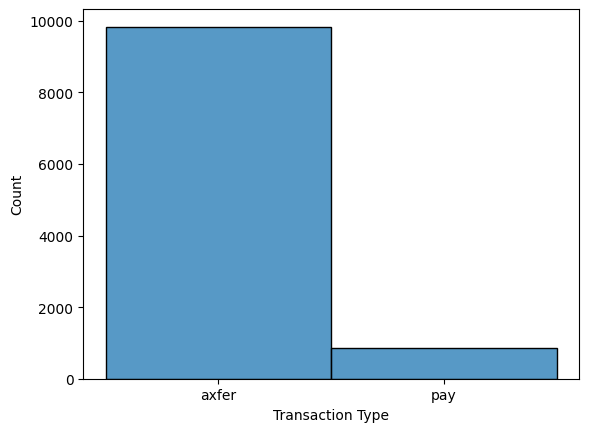

In [12]:
# Dentro de la temporalidad que tengo, los asset que salen de una cuenta, vuelven a ingresar? o solamente se van y no vuelven?

### Esto me puede decir capaz que hay senders mas centrales que distribuyen a receivers, capaz no es equitativo

# Histograma de tipo de transaccion
sb.histplot(df , x='Transaction Type')

In [14]:

### Dentro del tipo pay que pasa? la gente se manda algos?

payables = df[df['Transaction Type'] == 'pay']

payable_senders = payables['Sender Address']
payable_receivers = payables['Receiver Address']
list(set(payable_senders))

payable_amount = payables['Transaction Amount'].tolist()
transaction_amount = payable_amount
print(f'Transaction amount: {len(transaction_amount)}')

closing_transactions = payable_amount.count('NA')

print(f'Closing transactions: {closing_transactions}')
placeholder = []

for i in range(len(payable_amount)):
    amounts = payable_amount[i]
    if amounts != 'NA':
        placeholder.append(amounts)

payable_amount = placeholder
# print(len(payable_amount))

payable_amount = np.array(payable_amount)

mean_amount = np.mean(payable_amount)
mean_amount = mean_amount/1000000
mean_amount = round(mean_amount, 2)

# plt.hist(payable_amount, bins = 1000)
# plt.xlim([0,0.8*10**10])


amount_counter = payables.groupby(['Transaction Amount'])['Transaction Amount'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

#amount_counter = amount_counter.drop([1056])
# print(amount_counter)
# Checkeo cuantas transacciones mandan mas de un algo

more_than_one = payable_amount[payable_amount >= 1000000]
# print(more_than_one)
print(f'Number of transactions sending more than 1 Algo: {len(more_than_one)}') #831 de las transacciones son envios mayores que 1 algo
print(f'On average each with each transaction {mean_amount} Algos are being sent')

frac_more_than_one = len(payable_amount) / len(df['Sender Address'].tolist())
percent_more_than_one = frac_more_than_one*100
percent_more_than_one = round(percent_more_than_one,2)
# print(frac_more_than_one*100)

print(f'{percent_more_than_one} % of total transactions are type pay and send more than 1 Algo')

Transaction amount: 850
Closing transactions: 499
Number of transactions sending more than 1 Algo: 58
On average each with each transaction 624.82 Algos are being sent
3.29 % of total transactions are type pay and send more than 1 Algo


In [35]:
# Histograma de distacia entre transacciones (contando por bloque) promedio para senders y receivers

# Para el address central, hay algun tipo de temporalidad para el envio de las transacciones que hace? y para las que ya hizo, se repiten?

### Cosas que necesito algun tipo de API
# Obtener la cantidad de transacciones totales hechas por cada cuenta unica en el frame de temporalidad de 500 bloques, y ver si se puede
# deducir a partir de cuantas transacciones hace en promedio una cuenta si alguien es una app o un humano. Importa tambien cuantas
# transacciones en promedio realiza cada address en su lifetime.

2995

In [15]:
# Numero de transacciones totales en 500 bloques
print(f'Total number of transactions: {total_transactions}')
# Numero de Senders
print(f'Total number of senders: {len(sender_unique)}')
# Numero de Receivers
print(f'Total number of receivers: {len(receiver_unique)}')
# Numero total de cuentas activas en este chunk
print(f'Total active accounts in this chunk: {len(total_accounts)}')
print(f'Mean amount of transactions per sender: {round(mean_txn_per_sender,2)}')
print(f'Mean amount of unique receiver accounts for a given sender: {round(mean_unique_connections_per_sender,2)}')
print(f'Mean amount of transactions per receiver: {round(mean_txn_per_receiver,2)}')
print(f'Mean amount of unique sender accounts for a given receiver: {round(mean_unique_connections_per_receiver,2)}')
print(f'Number of only sender accounts: {len(only_sender)}')
print(f'{round(sender_proportion*100,2)}% percent of senders are only senders')
print(f'{round(sender_total_proportion*100,2)}% percent of accounts are only senders')
print(f'Number of only receiver accounts: {len(only_receiver)}')
print(f'{round(receiver_proportion*100,2)}% percent of receivers are only receivers')
print(f'{round(receiver_total_proportion*100,2)}% percent of accounts are only receivers')
print(f'A given sender in average transacts with {round(mean_sender_comms_count,2)} accounts')
print(f'A given receiver in average transacts with {round(mean_receivers_comms_count,2)} accounts')
print(f'A given sender in average transacts with the same account {round(real_mean_senders,2)} times')
print(f'A given receiver in average transacts with the same account {round(real_mean_receivers,2)} times')
print(f'Top 10 most frequently used Assets Ids :{Ids}')
print(f'Percenteage of total transactions involving each asset: {asset_total_proportion*100}')
print(f'Number of unique senders for each asset: {unique_sending}')
print(f'Number of unique receivers for each asset: {unique_receiving}')
print(f'Number of unique accounts for each asset: {unique_accounts}')
print(f'Percentage of total accounts using this given asseta for each asset: {account_proportion*100,2}')
print(f'Number of transaction which send 1 of an Asset: {amount_1}')
print(what_asset.count(127746157))
print(list(set(what_asset)))
print(f'Tipos de transaccion: {txn_type} \n')
print(f'Total involved accounts per transaction type: {accounts_per_type} \n')
print(f'Total senders involved per transaction type : {senders_per_type}\n')
print(f'Total receivers involved per transaction type: {receivers_per_type} \n')
print(f'Percentage of all accounts involved for each transaction type {percent_accounts_per_type}')
print(f'Transaction amount: {len(transaction_amount)}')
print(f'Closing transactions: {closing_transactions}')
print(f'Number of transactions sending more than 1 Algo: {len(more_than_one)}') #831 de las transacciones son envios mayores que 1 algo
print(f'On average each with each transaction {mean_amount} Algos are being sent')
print(f'{percent_more_than_one} % of total transactions are type pay and send more than 1 Algo')

Total number of transactions: 10684
Total number of senders: 341
Total number of receivers: 5016
Total active accounts in this chunk: 5037
Mean amount of transactions per sender: 31.33
Mean amount of unique receiver accounts for a given sender: 15.56
Mean amount of transactions per receiver: 2.13
Mean amount of unique sender accounts for a given receiver: 1.06
Number of only sender accounts: 21
6.16% percent of senders are only senders
0.42% percent of accounts are only senders
Number of only receiver accounts: 4696
93.62% percent of receivers are only receivers
93.23% percent of accounts are only receivers
A given sender in average transacts with 15.56 accounts
A given receiver in average transacts with 1.06 accounts
A given sender in average transacts with the same account 2.62 times
A given receiver in average transacts with the same account 2.07 times
Top 10 most frequently used Assets Ids :[27165954, 2513338, 2512768, 2513746, 2514157, 2254146, 312769]
Percenteage of total transac